In [80]:
from regex import P

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import psycopg2
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

In [81]:
from bs4 import BeautifulSoup

In [82]:
pip install beautifulsoup4 selenium

Note: you may need to restart the kernel to use updated packages.


In [83]:
url  = 'https://kauno.diena.lt/'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')


In [84]:
straipsniai = bs.find_all('div', {'class' :'category-block-row grid-12 alpha omega unscore'})
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(len(straipsniai))

41


In [85]:
url = "https://kauno.diena.lt/naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275"

page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')
# print(bs)

In [86]:
straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
print(len(straipsniai))

1


In [87]:
straipsniai[0].text

'– Devyneri su puse metų – greitai minėsite dešimtmečio sukaktį. Dar užpernai pasiekėte rekordą, būdamas ilgiausiai dirbančiu Kauno meru per nepriklausomybės laikotarpį. Ką jums tai reiškia?\n– Nesureikšminu tų skaičių ir rekordų, bet viena žinau, kad pats nebejaunėju. Gal dėl to ir norisi dar daug ką suspėti. Atrodo, nuveikta tikrai nemažai, bet kai pažiūriu, kiek visko priplanuota... Esu ramus, kad ateičiai nemažai projektų jau paruošta, kiti – rengimo stadijoje. Idėjų mūsų komandai niekada netrūko – reikia tik užtektinai finansų ir šiek tiek laiko joms įgyvendinti. Gal dar kokių dešimties metų (juokiasi)...\n\n\n– Jūs šypsotės, bet daugelis išties norėtų sužinoti, kiek dar turite ambicijų tęsti darbus Kauno mero poste?\n– Čia vienas dažnesnių klausimų, į kurį atsakymo pats sau neturiu. Tai niekada nebuvo mano asmeninė ambicija. Turėjau tik labai konkretų norą – sutvarkyti, pakeisti miestą. Pamenu, kažkada išvis galvojau neiti į šitas pareigas, po rinkimų 2015-aisiais domėjausi, kaip

In [88]:
for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
if i is not None:
    t = i.find('a', {'class':'articles-list-title'})
    print('::REM::')
    print(t)
    print('HREF?')
    print(t['href'])
    print(t.text)

In [89]:
# Surinkite visus straipsnių pavadinimus ir nuorodas į pačius straipsnius iš Kauno  diena puslapio.
# Suraskite vidutinį straipsnių pavadinimuose esančių žodžių skaičių. 
# Atvaizduoikite grafiškai straipsnių kiekį VS žodžių kiekis pavadinime.
# Suraskite ilgiausią pavadinimą, nueikite į tą straipsnį, suraskite 5kis
# dažniausiai pasikartojančius žodžius, iliustruokite grafiškai. Suskaičiuokite,
# kiek vidutiniškai turi žodžių straipsniai, esantys Kauno dienoje.

In [90]:
url  = 'https://kauno.diena.lt/'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [91]:
straipsniai = bs.find_all('div', {'class' :'articles-list-title-wrapper'})
print(straipsniai)

[<div class="articles-list-title-wrapper">
<a class="articles-list-title" href="naujienos/kaunas/nusikaltimai-ir-nelaimes/jonavos-garazuose-saudynes-persautas-jaunas-vyras-sulaikyti-keturi-itariamieji-1195488" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">Jonavos garažuose – šaudynės: peršautas jaunas vyras, sulaikyti keturi įtariamieji</a><a href="naujienos/kaunas/nusikaltimai-ir-nelaimes/jonavos-garazuose-saudynes-persautas-jaunas-vyras-sulaikyti-keturi-itariamieji-1195488?komentarai" style="font-size: 14px;display: inline-block;color: #9D9D9D;height: 20px;vertical-align:text-top;">
<i class="flaticon-speechbubble63 media-icon-default media-icon-default-komentarai" title="Komentarai"></i>
<div class="articles-list-comments-count-new" style="display: inline-block;height: 20px;">20</div>
</a></div>, <div class="articles-list-title-wrapper">
<a class="articles-list-title" href="naujienos/lietuva/politika/seima-paliksiantys-parlamentarai-gaus-dosnias-iseit

In [92]:
titles = []
links = []


for straipsnis in straipsniai:
    title_tag = straipsnis.find('a')
    if title_tag:
        title = title_tag.get_text().strip()
        link = title_tag['href']
        titles.append(title)
        links.append(link)

print(titles)
print(links)

df = pd.DataFrame({'Title': titles,'Link': links})

print(df.head())

['Jonavos garažuose – šaudynės: peršautas jaunas vyras, sulaikyti keturi įtariamieji', 'Seimą paliksiantys parlamentarai gaus dosnias išeitines išmokas', 'Kaip kauniečiams sekasi rūšiuoti maisto atliekas?', 'Kauno zoologijos sode buvo kilęs gaisras', 'Kauno rajone vyras policijos pareigūnams grasino ginklu', 'Medikai: anksti nustatyta liga gelbsti gyvybes', 'Floridą siaubusio uragano „Milton“ aukų skaičius išaugo iki 16', 'Fotografijos ir medijų festivalyje – tai, kas rūpi šiandien', 'Jonavoje liepsnojo automobilis: įtariamas padegimas', 'Kaune vyks tarptautinė konferencija apie ekologiją', '„Žalgirio“ areną užliejo lietuviškų prekių paroda: stebina pasirinkimo gausa', 'Ruošiamasi šaltajam periodui: Kaune baigėsi fontanų ir lauko gertuvių sezonas', 'Nuo maisto iki buitinės chemijos: Lietuvos pirkėjams reikia lietuviškų gaminių', 'Į pakaunę lėkė pareigūnai: girto vyro rankose – nelegalus ginklas', 'Taškas, kuris išėjo pasivaikščioti, atklydo į galeriją', 'VDU atidaromas pirmasis Lietuvo

In [93]:
df['Word Count'] = df['Title'].apply(lambda x: len(x.split()))
avg_word_count = df['Word Count'].mean()
print(f'Vidutinis zodziu skaicius: {avg_word_count:.2f}')

Vidutinis zodziu skaicius: 8.37


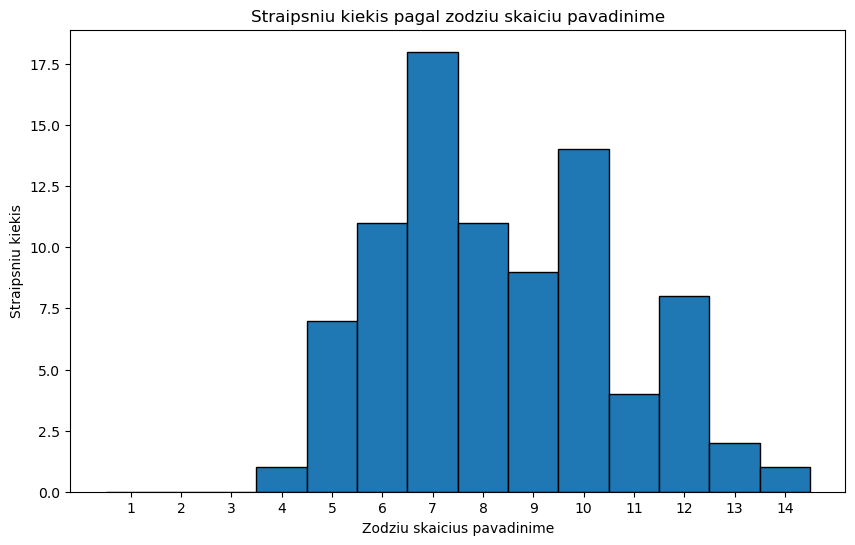

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()

In [95]:
longest_title = df.loc[df['Word Count'].idxmax()]
print(f"Ilgiausias straipsnio pavadinimas: {longest_title['Title']}")

Ilgiausias straipsnio pavadinimas: Seimo rinkimuose dirbs virš 3 tūkst. stebėtojų ir apie 16 tūkst. rinkimų komisijų narių


In [96]:
print(f"URL: {longest_title['Link']}")

URL: naujienos/lietuva/politika/seimo-rinkimuose-dirbs-virs-3-tukst-stebetoju-ir-apie-16-tukst-rinkimu-komisiju-nariu-1195538


In [97]:
base_url = "https://kauno.diena.lt/"


longest_title = df.loc[df['Word Count'].idxmax()]


print(f"Ilgiausias straipsnio pavadinimas: {longest_title['Title']}")


url = longest_title['Link']
if not url.startswith('https://'):
    url = base_url + url


print(f"URL: {url}")

Ilgiausias straipsnio pavadinimas: Seimo rinkimuose dirbs virš 3 tūkst. stebėtojų ir apie 16 tūkst. rinkimų komisijų narių
URL: https://kauno.diena.lt/naujienos/lietuva/politika/seimo-rinkimuose-dirbs-virs-3-tukst-stebetoju-ir-apie-16-tukst-rinkimu-komisiju-nariu-1195538


In [98]:
# url = longest_title['Link']
page = requests.get(url)
source = page.content
bs = BeautifulSoup(source, 'html.parser')

article_text = ' '.join([p.get_text() for p in bs.find_all('p')])
print(article_text[:500])


Šį sekmadienį vyksiančiuose Seimo rinkimuose dirbs apie 16 tūkst. rinkimų komisijų narių, skaidrumą prižiūrės daugiau kaip 3,1 tūkst. rinkimų stebėtojų, skelbia Vyriausioji rinkimų komisija (VRK). Seimo rinkimų metu 70-yje rinkimų apygardų dirbs apie 1 tūkst. apygardų rinkimų komisijų narių, o 1895 rinkimų apylinkėse rinkėjus aptarnaus ir apylinkėms užsidarius balsus skaičiuos dar apie 15 tūkst. apylinkių rinkimų komisijų narių.  VRK duomenimis, iki balsavimo iš anksto pradžios jau yra registruo


Top 5 zodziai:
rinkimų: 25 kartu
ir: 12 kartu
tūkst: 9 kartu
kad: 8 kartu
seimo: 6 kartu


<Axes: title={'center': 'Top 5 Daugiausiai pasikartojantis zodziai'}, xlabel='Zodis'>

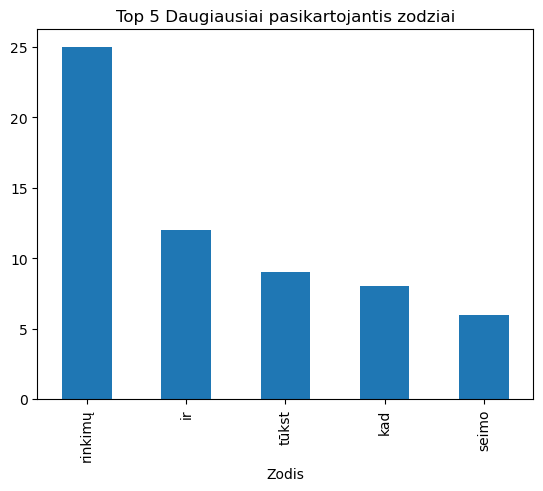

In [99]:
words = article_text.split()
words = [word.strip('.,!?()"\'').lower() for word in words]

word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

sorted_words = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
top_5_words = sorted_words[:5]

print("Top 5 zodziai:")
for word, freq in top_5_words:
    print(f"{word}: {freq} kartu")

df_top_words = pd.DataFrame(top_5_words, columns=['Zodis', 'Daznis'])

df_top_words.plot(kind='bar', x='Zodis', y='Daznis', legend=False, title='Top 5 Daugiausiai pasikartojantis zodziai')

In [100]:
base_url = 'https://kauno.diena.lt/'
article_lengths = []

for link in df['Link']:
    if not link.startswith('http'):
        link = base_url + link
    page = requests.get(link)
    source = page.content
    bs = BeautifulSoup(source, 'html.parser')
    
    article_text = ' '.join([p.get_text() for p in bs.find_all('p')])
    word_count = len(article_text.split())
    article_lengths.append(word_count)

avg_article_word_count = sum(article_lengths) / len(article_lengths)
print(f'Vidutinis zodziu skaicius straipsniuose: {avg_article_word_count:.2f}')


Vidutinis zodziu skaicius straipsniuose: 667.21


In [101]:
# Papildymas užduoties: 
# atlikite tą patį su delfi.lt, palyginkite tarpusavyje kauno dieną ir delfi.lt, palyginimus
# atlikite pateikdami grafikus.

In [102]:
url  = 'https://delfi.lt/'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [103]:
straipsniai = bs.find_all('main', {'class':'main-wrapper'})
print(len(straipsniai))

1


In [104]:
straipsniai[0].text

'           \n            Kriminalai ir nelaimės\n            Šokiruojantis reidas Vilniuje: prigėrusi motina vežėsi savo du mažamečius vaikus, o apsvaigusiai gydytojai nepadėjo ir „Marijos radijas“ (1)              \n            Lietuvoje\n            Konstatavo, kad karas Ukrainoje nesibaigs derybomis: mato tik dvi išeitis, kaip Ukraina galėtų laimėti (12)   139  nutylima itin svarbi detalė           \n            Pasaulis yra mažas\n            Už tarptautinėje rinkoje įvertintą verslą Dovilė yra dėkinga savo močiutei: 1990 metais nuo jos viskas ir prasidėjo                \n            Verslo požiūris x Karjera\n            Pasitikrink, ar priklausai vidurinei klasei – kiek eurų per mėnesį tam reikia  (7)             \n            Užsienyje\n            Iš Bideno lūpų – perspėjimas Iranui: pasikėsinimas į Trumpą bus vertinamas kaip karo veiksmai (2)   35  Trumpas paprašė papildomos apsaugos        Transliacija      \n            Video\n            ELTA savaitė. Ukrainos žurnalistas

In [105]:
print(straipsniai)

[<main class="main-wrapper"><div data-fetch-key="0"><div class="container default"><div class="row"><!-- --> <!-- --> <div class="col col-main"><section class="section row" data-section-index="0" data-v-2150e282="" style="height:auto;"><!-- --> <div class="col bg-00000000" data-v-2150e282="" style="background-color:#00000000;"><div class="block-type-26 headline-blocks" data-v-20baf12e="" data-v-da9f5528=""><div class="banner" data-v-20baf12e=""><div id=""></div></div></div><div class="block-type-102 headline-blocks" data-container="articles-container" data-v-da9f5528=""><div class="row"><div class="col-12"><div class="block-type-102 grid-23" data-v-9f4129aa=""><div class="row" data-v-9f4129aa=""><section class="block-type-102-headline-col block-type-102-headline-col--before-ad" data-container="swappable-container" data-dropzone="article-dropzone" data-v-9f4129aa=""><article class="block-type-102-headline" data-draggable="swappable-item" data-v-9f4129aa=""><div class="row no-gutters ali

In [106]:
titles = bs.find_all('main', class_='main-wrapper')

In [107]:
print(titles)

[<main class="main-wrapper"><div data-fetch-key="0"><div class="container default"><div class="row"><!-- --> <!-- --> <div class="col col-main"><section class="section row" data-section-index="0" data-v-2150e282="" style="height:auto;"><!-- --> <div class="col bg-00000000" data-v-2150e282="" style="background-color:#00000000;"><div class="block-type-26 headline-blocks" data-v-20baf12e="" data-v-da9f5528=""><div class="banner" data-v-20baf12e=""><div id=""></div></div></div><div class="block-type-102 headline-blocks" data-container="articles-container" data-v-da9f5528=""><div class="row"><div class="col-12"><div class="block-type-102 grid-23" data-v-9f4129aa=""><div class="row" data-v-9f4129aa=""><section class="block-type-102-headline-col block-type-102-headline-col--before-ad" data-container="swappable-container" data-dropzone="article-dropzone" data-v-9f4129aa=""><article class="block-type-102-headline" data-draggable="swappable-item" data-v-9f4129aa=""><div class="row no-gutters ali

In [108]:
articles = bs.find_all('h5', class_='headline-title')
headers = []
links = []

for article in articles:
    link = article.find('a')['href']
    header = article.get_text(strip=True)
    if not link.startswith('http'):
        link = 'https://delfi.lt' + link
    headers.append(header)
    links.append(link)
    print(f"Link: {link}, Header: {header}")

df = pd.DataFrame({'Header': headers,'Link': links})

print(df.head())


Link: https://delfi.lt/news/daily/crime/sokiruojantis-reidas-vilniuje-prigerusi-motina-vezesi-savo-du-mazamecius-vaikus-o-apsvaigusiai-gydytojai-nepadejo-ir-marijos-radijas-120056758, Header: Šokiruojantis reidas Vilniuje: prigėrusi motina vežėsi savo du mažamečius vaikus, o apsvaigusiai gydytojai nepadėjo ir „Marijos radijas“(1)
Link: https://delfi.lt/news/daily/lithuania/konstatavo-kad-karas-ukrainoje-nesibaigs-derybomis-mato-tik-dvi-iseitis-kaip-ukraina-galetu-laimeti-120056314, Header: Konstatavo, kad karas Ukrainoje nesibaigs derybomis: mato tik dvi išeitis, kaip Ukraina galėtų laimėti(12)139
Link: https://www.delfi.lt/projektai/pasaulis-yra-mazas/uz-tarptautineje-rinkoje-ivertinta-versla-dovile-yra-dekinga-savo-mociutei-1990-metais-nuo-jos-viskas-ir-prasidejo-120054694, Header: Už tarptautinėje rinkoje įvertintą verslą Dovilė yra dėkinga savo močiutei: 1990 metais nuo jos viskas ir prasidėjo
Link: https://www.delfi.lt/verslo-poziuris/naujienos/pasitikrink-ar-priklausai-vidurinei-

In [109]:
Links_count = df['Link'].count
print(Links_count)

<bound method Series.count of 0     https://delfi.lt/news/daily/crime/sokiruojanti...
1     https://delfi.lt/news/daily/lithuania/konstata...
2     https://www.delfi.lt/projektai/pasaulis-yra-ma...
3     https://www.delfi.lt/verslo-poziuris/naujienos...
4     https://delfi.lt/news/daily/world/is-bideno-lu...
                            ...                        
88    https://delfi.lt/news/daily/lithuania/krusos-s...
89    https://delfi.lt/news/daily/lithuania/rinkimu-...
90    https://delfi.lt/news/daily/lithuania/nauseda-...
91    https://delfi.lt/news/daily/politics/pries-pat...
92    https://delfi.lt/news/daily/lithuania/duomenu-...
Name: Link, Length: 93, dtype: object>


In [110]:
df['Word Count'] = df['Header'].apply(lambda x: len(x.split()))
avg_word_count = df['Word Count'].mean()
print(f'Vidutinis zodziu skaicius: {avg_word_count:.2f}')

Vidutinis zodziu skaicius: 10.86


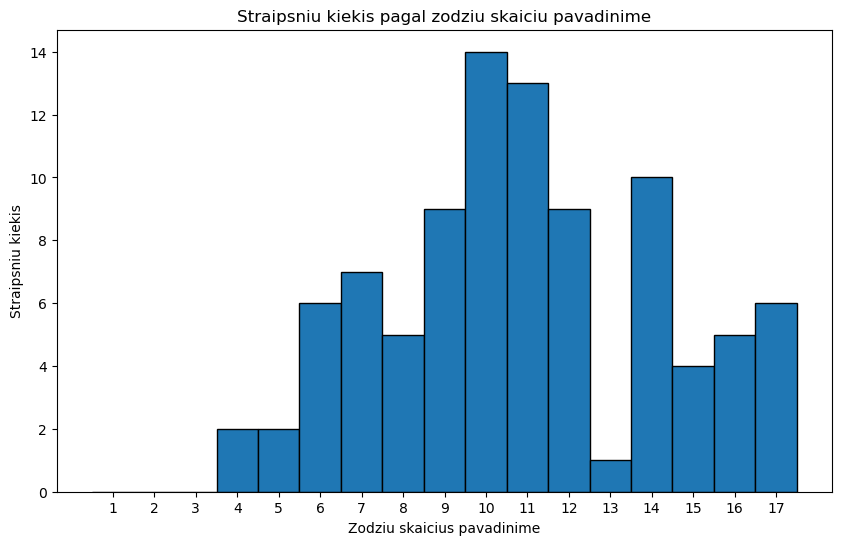

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()

In [112]:
longest_header = df.loc[df['Word Count'].idxmax()]
print(f"Ilgiausias straipsnio pavadinimas: {longest_header['Header']}")

Ilgiausias straipsnio pavadinimas: Šokiruojantis reidas Vilniuje: prigėrusi motina vežėsi savo du mažamečius vaikus, o apsvaigusiai gydytojai nepadėjo ir „Marijos radijas“(1)


In [113]:
print(f"URL: {longest_header['Link']}")

URL: https://delfi.lt/news/daily/crime/sokiruojantis-reidas-vilniuje-prigerusi-motina-vezesi-savo-du-mazamecius-vaikus-o-apsvaigusiai-gydytojai-nepadejo-ir-marijos-radijas-120056758


In [114]:
url = longest_header['Link']
page = requests.get(url)
source = page.content
bs = BeautifulSoup(source, 'html.parser')

article_text = ' '.join([p.get_text() for p in bs.find_all('p')])
print(article_text[:500])

Šeštadienį kelių policija vykdė patikras Vilniaus apskrityje. Priemonių metu pareigūnus apstulbino motinos elgesys – automobilyje vežėsi du savo mažamečius vaikus, nors buvo stipriai apsvaigusi. Per kelias valandas (nuo 9 val. iki 12 val.) pareigūnams pavyko sučiupti net 7 apsvaigusius vairuotojus. Švenčionių rajone, Pabradėje, prisidirbo pirmasis žmogus – 67 metų vyras vairavo automobilį „Jeep“ būdamas girtas. Patikros metu alkoholio matuoklis parodė 1,83 prom. girtumą. Ukmergėje taip pat buvo 


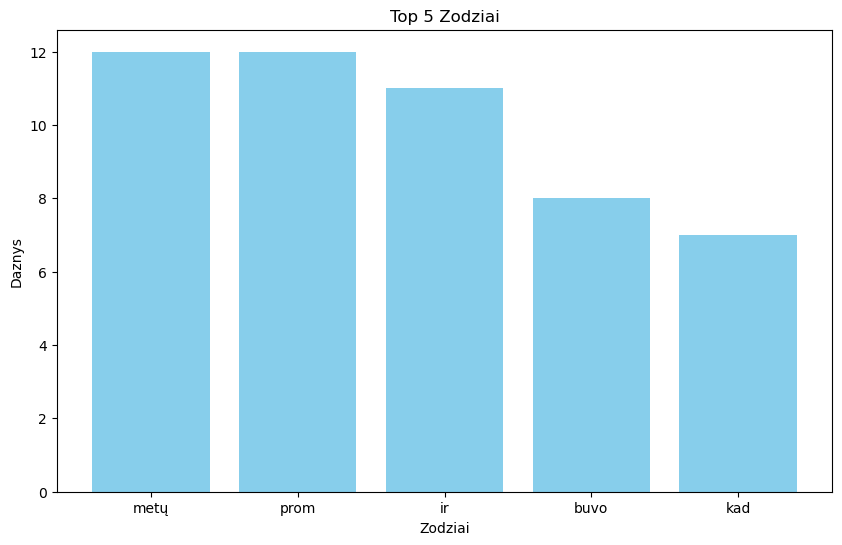

In [115]:
text_clean = ''
for char in article_text:
    if char.isalpha() or char.isspace():
        text_clean += char.lower()

words = text_clean.split()

word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 5 Zodziai')
plt.xlabel('Zodziai')
plt.ylabel('Daznys')
plt.show()

In [116]:
base_url = 'https://www.delfi.lt/'
article_lengths = []

for link in df['Link']:
    if not link.startswith('http'):
        link = base_url + link
    page = requests.get(link)
    source = page.content
    bs = BeautifulSoup(source, 'html.parser')
    
    article_text = ' '.join([p.get_text() for p in bs.find_all('p')])
    word_count = len(article_text.split())
    article_lengths.append(word_count)

avg_article_word_count = sum(article_lengths) / len(article_lengths)
print(f'Vidutinis zodziu skaicius straipsniuose: {avg_article_word_count:.2f}')

Vidutinis zodziu skaicius straipsniuose: 416.59


In [ ]:
df_top_words.plot(kind='bar', x='Zodis', y='Daznis', legend=False, title='Top 5 Daugiausiai pasikartojantis zodziai')

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 5 Zodziai')
plt.xlabel('Zodziai')
plt.ylabel('Daznys')
plt.show()




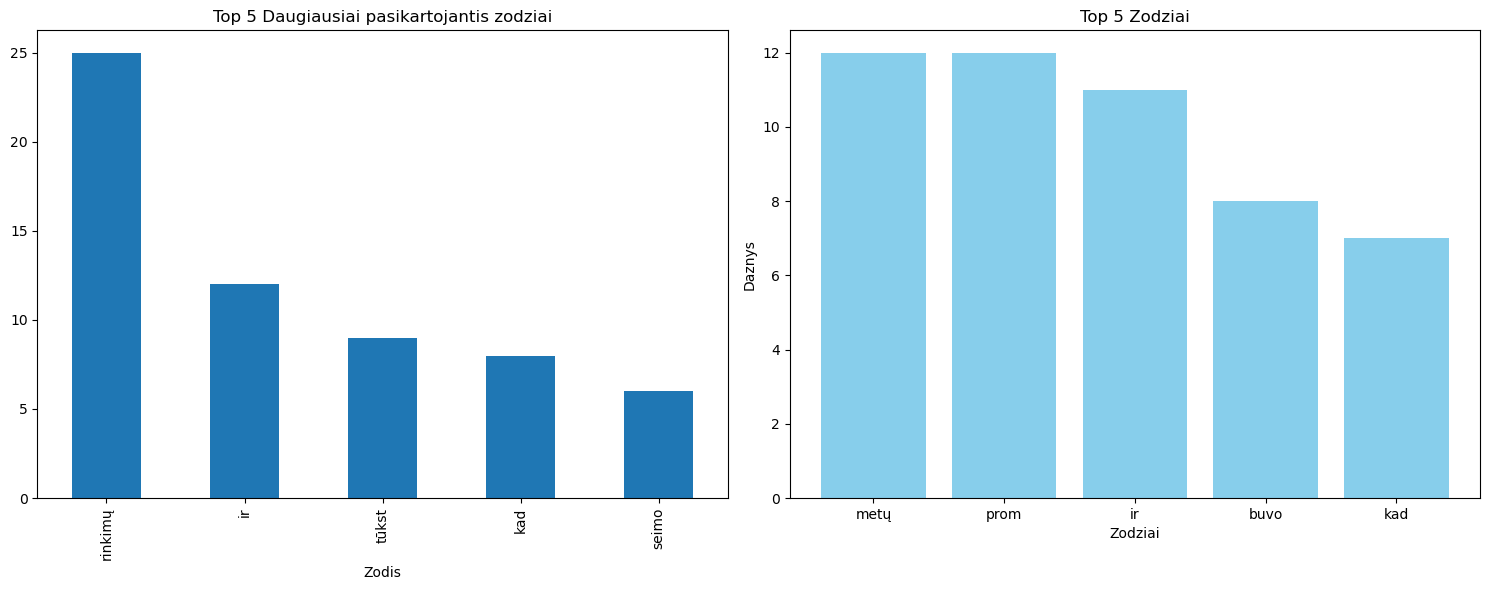

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_top_words.plot(
    kind='bar', x='Zodis', y='Daznis', 
    ax=axes[0], legend=False, title='Top 5 Daugiausiai pasikartojantis zodziai')

axes[1].bar(words, counts, color='skyblue')
axes[1].set_title('Top 5 Zodziai')
axes[1].set_xlabel('Zodziai')
axes[1].set_ylabel('Daznys')

plt.tight_layout()

plt.show()


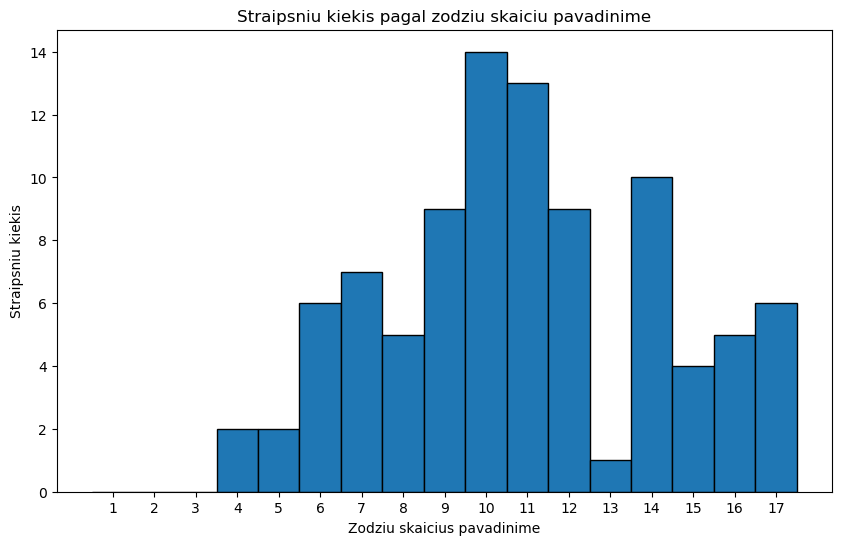

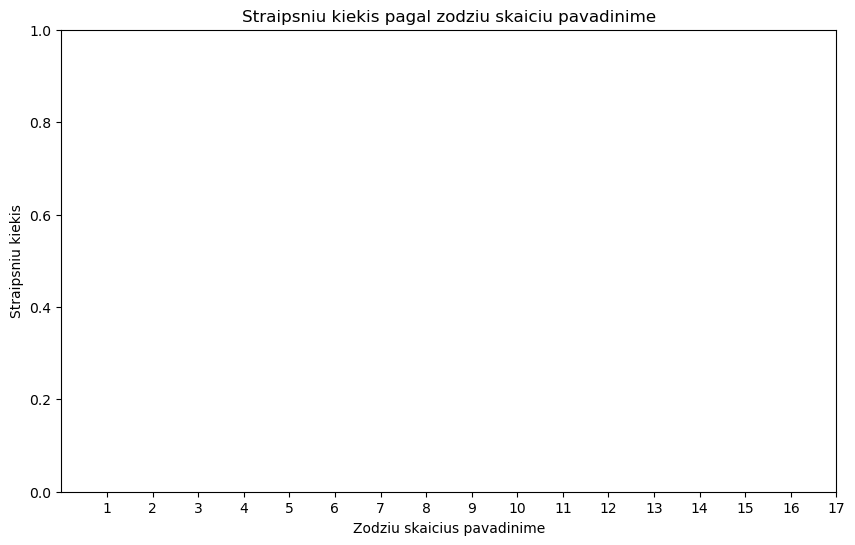

In [122]:
# 2
plt.figure(figsize=(10, 6))
plt.hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()
# 1
plt.figure(figsize=(10, 6))
plt.hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()

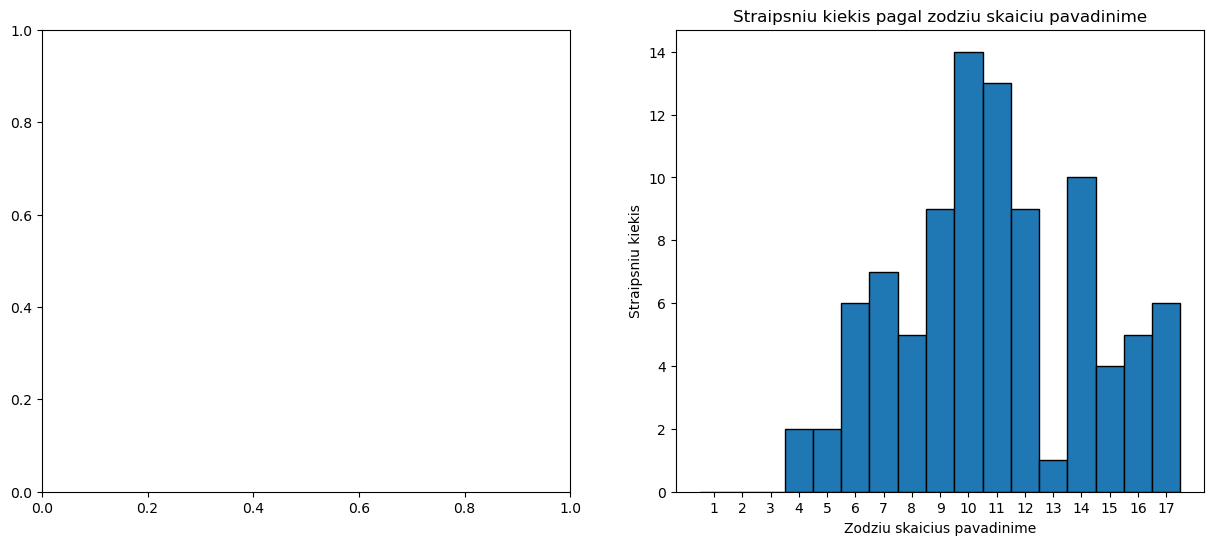

IndexError: index 2 is out of bounds for axis 0 with size 2

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


plt.hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()


axes[2].hist(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), align='left', edgecolor='black')
plt.title('Straipsniu kiekis pagal zodziu skaiciu pavadinime')
plt.xlabel('Zodziu skaicius pavadinime')
plt.ylabel('Straipsniu kiekis')
plt.xticks(range(1, max(df['Word Count']) + 1))
plt.show()
# df_top_words.plot(
#     kind='bar', x='Zodis', y='Daznis', 
#     ax=axes[0], legend=False, title='Top 5 Daugiausiai pasikartojantis zodziai')

# axes[1].bar(df['Word Count'], bins=range(1, max(df['Word Count']) + 2), color='skyblue')
# axes[1].set_title('Top 5 Zodziai')
# axes[1].set_xlabel('Zodziai')
# axes[1].set_ylabel('Daznys')

In [128]:
url  = 'https://3rm.info/'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [133]:
straipsniai = bs.find_all('div', {'id':'all'})
print(len(straipsniai))

1


In [134]:
print(straipsniai)

[<div id="all">
<div id="container">
<div id="above">
<div class="vetka"></div>
<!-- Сюда можно вставить баннер на 1000пкс. -->
</div>
<div id="content">
<div class="nav3">
<!-- ГОРИЗОНТАЛЬНОЕ МЕНЮ 2 -->
<ul>
<!--        <li><a href="https://3rm.info/" class="link1">ГЛАВНАЯ</a></li>  -->
<li class="drop"><a class="link1" href="#">ГЛАВНАЯ</a>
<ul>
<li><a href="https://3rm.info/">ГЛАВНАЯ СТРАНИЦА</a></li>
<li><a href="https://3rm.info/publications">ПУБЛИКАЦИИ</a></li>
<li><a href="https://3rm.info/mainnews">ИЗБРАННОЕ</a></li>
<li><a href="https://3rm.info/main">НОВОСТИ</a></li>
<li><a href="https://3rm.info/edition">ОТ РЕДАКЦИИ</a></li>
</ul>
</li>
<li class="drop"><a class="link1" href="#">О ДУХОВНОМ</a>
<ul>
<li><a href="https://3rm.info/ortodox">ПРАВОСЛАВИЕ</a></li>
<li><a href="https://3rm.info/apokalipsis">АПОКАЛИПСИС</a></li>
<li><a href="https://3rm.info/prorochestva">ПРОРОЧЕСТВА</a></li>
<li><a href="https://3rm.info/sermon">ПРОПОВЕДИ</a></li>
<li><a href="https://3rm.info/ekumen

In [ ]:
straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
print(len(straipsniai))

In [150]:
articles = bs.find_all('div', class_=lambda x: x and x.startswith('custom-'))
print(articles)
hrefs = []
titles = []
for div in articles:
    link = div.find('a', href=True, title=True)
    if link:
        hrefs.append(link['href'])
        titles.append(link['title'])

df = pd.DataFrame({'Title': titles, 'Href': hrefs})


print(df)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)
# headers = []
# links = []

# for article in articles:
#     link = article.find('a')
#     header = article.get('title')
#     # if not link.startswith('http'):
#         # link = 'https://3rm.info/' + link
#     headers.append(header)
#     links.append(link)
#     print(f"Link: {link}, Header: {header}")

# df = pd.DataFrame({'Header': headers,'Link': links})

# print(df.head())

[<div class="custom-1">
<a href="https://3rm.info/main/28279-ozdorovlenie-organizma-chichagov.html" title="БУДЬТЕ ЗДОРОВЫ... ОЗДОРОВЛЕНИЕ ОРГАНИЗМА по системе сщмч. Серафима (Чичагова). (ВИДЕО)">
<img )";"="" ,="" alt="" progid:dximagetransform.microsoft.alphaimageloader(src="https://3rm.info/uploads/posts/2015-11/1448697188_zdorovyy-malysh-1.jpg" sizingmethod="scale" src="/templates/BsD/images/spacer.gif" style="background:url(https://3rm.info/uploads/posts/2015-11/1448697188_zdorovyy-malysh-1.jpg) no-repeat; background-size: cover;-webkit-background-size:cover; -o-background-size:cover; -moz-background-size: cover;filter: progid:DXImageTransform.Microsoft.AlphaImageLoader(src='https://3rm.info/uploads/posts/2015-11/1448697188_zdorovyy-malysh-1.jpg', sizingMethod='scale');
-ms-filter: "/>
<div class="custom-title">БУДЬТЕ ЗДОРОВЫ... ОЗДОРОВЛЕНИЕ ОРГАНИЗМА по системе сщмч. Серафима (Чичагова). (ВИДЕО)</div>
</a>
<div class="c1cat"><a href="https://3rm.info/main/">Новости</a> / <a href="